# PIK3CA: Effects of Hotspot Mutation on AKT1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

### Import CPTAC

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [4]:
protein = 'BACH2'
gene = 'PIK3CA'

## Extract the data for hotspot mutations only 

In [5]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [6]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
#print(p10_mutations)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(len(p10_mutations.loc[(p10_mutations['Within_Hotspot'] == True)]))

Gene BACH2 not found in proteomics data


TypeError: 'NoneType' object does not support item assignment

## Hotspot mutation vs non-hotspot mutation

In [ ]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

## Hotspot mutation vs other mutations and wildtype

In [ ]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

## All mutations vs wildtype

In [ ]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

## Hotspot mutation v wildtype

In [ ]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on AKT1 abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [7]:
phos_mutations = CPTAC.compare_mutations(phos, protein, gene)
phos_mutations['Within_Hotspot'] = False
phos_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True

phos_mutations.loc[phos_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
print(phos_mutations)


phos_mutations = phos_mutations.loc[phos_mutations['Patient_Type'] == 'Tumor']
#phos_mutations = phos_mutations.dropna(axis = 0)
#print(phos_mutations)
phos_sites = list(phos_mutations)
phos_sites = phos_sites[:(len(phos_sites) - 3)]

      BACH2-S159  BACH2-S315  BACH2-S337  BACH2-S367  BACH2-S409  BACH2-S510  \
S001         NaN     -0.8990         NaN         NaN         NaN         NaN   
S002         NaN     -0.6565         NaN      0.1630         NaN         NaN   
S003         NaN     -0.5450         NaN         NaN         NaN         NaN   
S004         NaN     -0.0680      0.5840         NaN    0.860000      0.5920   
S005         NaN         NaN         NaN         NaN         NaN         NaN   
S006         NaN     -0.9210         NaN         NaN         NaN         NaN   
S007         NaN     -0.9680         NaN     -0.4240         NaN         NaN   
S008    -0.70300     -0.4990         NaN         NaN         NaN         NaN   
S009         NaN     -0.1570      0.3420         NaN    0.603000      0.1220   
S010         NaN     -0.0957         NaN         NaN         NaN         NaN   
S011         NaN     -0.1880         NaN         NaN         NaN         NaN   
S012    -1.41000     -0.0360         NaN

## Hotspot mutation vs non-hotspot mutation

In [8]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    
    print(site, " ", ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

BACH2-S159   Ttest_indResult(statistic=2.396486164635067, pvalue=0.05355067776736488)
BACH2-S315   Ttest_indResult(statistic=-0.04610990569877824, pvalue=0.9634774908825008)
BACH2-S337   Ttest_indResult(statistic=-0.7063558264608434, pvalue=0.5064559292847948)
BACH2-S367   Ttest_indResult(statistic=nan, pvalue=nan)
BACH2-S409   Ttest_indResult(statistic=0.37724469647748776, pvalue=0.7422601185240458)
BACH2-S510   Ttest_indResult(statistic=-0.2102031245692014, pvalue=0.8404655543143719)
BACH2-T319   Ttest_indResult(statistic=-0.47646954285243825, pvalue=0.6378780100124739)


## Hotspot mutation vs other mutations and wildtype

In [9]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] != True]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print(site, " ", ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

BACH2-S159   Ttest_indResult(statistic=0.15374726545094858, pvalue=0.8797314923564086)
BACH2-S315   Ttest_indResult(statistic=0.5741489718217783, pvalue=0.5675404814117764)
BACH2-S337   Ttest_indResult(statistic=-1.5178663601420808, pvalue=0.1549440624868545)
BACH2-S367   Ttest_indResult(statistic=nan, pvalue=nan)
BACH2-S409   Ttest_indResult(statistic=0.13930806753281114, pvalue=0.8946440570085852)
BACH2-S510   Ttest_indResult(statistic=-1.4810030662884732, pvalue=0.16437912616654815)
BACH2-T319   Ttest_indResult(statistic=0.24782919275626697, pvalue=0.8051730465574027)


## All mutations vs wildtype

In [10]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] != 'Wildtype']
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print(site, " ", ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

BACH2-S159   Ttest_indResult(statistic=-1.9447473574029386, pvalue=0.06959874823515755)
BACH2-S315   Ttest_indResult(statistic=1.2923173953978582, pvalue=0.20011213247243378)
BACH2-S337   Ttest_indResult(statistic=-2.3865565105378717, pvalue=0.03435012387581085)
BACH2-S367   Ttest_indResult(statistic=nan, pvalue=nan)
BACH2-S409   Ttest_indResult(statistic=-0.30893950203144577, pvalue=0.7698259969018864)
BACH2-S510   Ttest_indResult(statistic=-4.483054616952817, pvalue=0.0007484241489183486)
BACH2-T319   Ttest_indResult(statistic=1.459422372631268, pvalue=0.15003595412972362)


/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Hotspot mutation v wildtype

In [11]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print(site, " ", ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

BACH2-S159   Ttest_indResult(statistic=2.396486164635067, pvalue=0.05355067776736488)
BACH2-S315   Ttest_indResult(statistic=-0.04610990569877824, pvalue=0.9634774908825008)
BACH2-S337   Ttest_indResult(statistic=-0.7063558264608434, pvalue=0.5064559292847948)
BACH2-S367   Ttest_indResult(statistic=nan, pvalue=nan)
BACH2-S409   Ttest_indResult(statistic=0.37724469647748776, pvalue=0.7422601185240458)
BACH2-S510   Ttest_indResult(statistic=-0.2102031245692014, pvalue=0.8404655543143719)
BACH2-T319   Ttest_indResult(statistic=-0.47646954285243825, pvalue=0.6378780100124739)


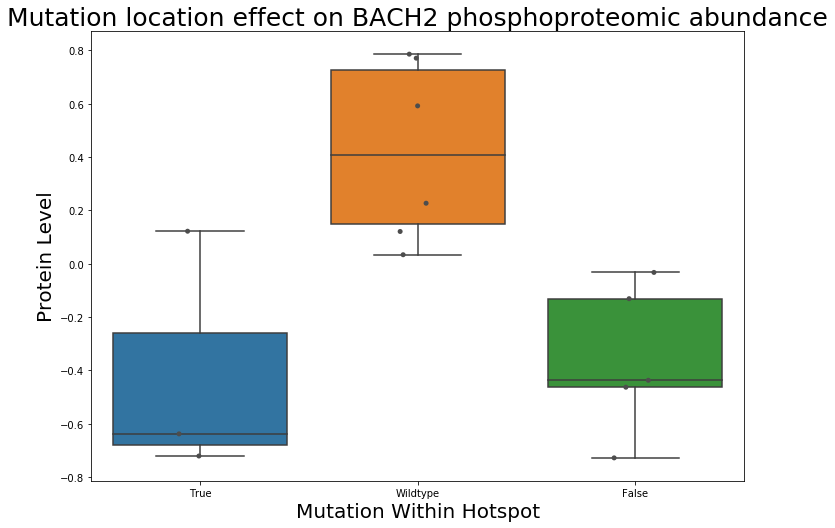

In [13]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = phos_mutations, x = 'Within_Hotspot', y = 'BACH2-S510', ax = ax)
boxplt = sns.stripplot(data = phos_mutations, x = 'Within_Hotspot', y = 'BACH2-S510', jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on BACH2 phosphoproteomic abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()